<div style="text-align: center;">

### EASTER 2025 SEMESTER  EXAMINATION 


FACULTY OF ENGINEERING, DESIGN AND TECHNOLOGY 

DEPARTMENT OF COMPUTING AND TECHNOLOGY 

MASTER OF INFORMATION TECHNOLOGY

YEAR 1 SEMESTER:  2

COURSE CODE:  DSC8204

COURSE NAME:  DATA ANALYSIS AND PROCESS MINING



</div>


<div style="text-align: left;">

#### Name: Ogabaniruhanga September

#### Access number: B30918

#### Registration Number: S24M10/006

</div>

In [34]:
# Importing necessary libraries for data manipulation and visualization
# Installing and importing the libraries to read the dataset
# %pip install pandas
# %pip install openpyxl
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore, shapiro, pearsonr, linregress, f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# Set style for plots

import warnings 
%pip install scipy scikit-learn seaborn matplotlib

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)  # Set default figure size

Note: you may need to restart the kernel to use updated packages.


### GOAL 4

#### Prediction of Heart Arrhythmia in the Health Sector [30 Marks]

Context: Diagnosis of a heart arrhythmia involves measuring the heart activity for irregular heart beat using Electrocardiogram (ECG) and then  analysing the recorded data. However, there are challenges in identifying arrhythmias due to the high number of parameters (i.e. > 270) involved in the tests. These parameters can lead to false diagnosis. Therefore, it is important to identify the key parameters using suitable statistical tests, which in turn helps clinical staff accurately identify arrhythmias. 

#### 1. Data Collection and Preprocessing:

a. Data Source: You are provided with a dataset “arrhythmia-

1.data.csv” which contains medical data and a text file that contains the variable descriptions (“arrhythmia.names.txt”)

b. Preprocess the dataset for further analyses.

#### 2. Exploratory Data Analysis:

a. Explain the distribution of the variables and whether they deviate far from the expected normal ranges of a heart experiencing arrhythmia

b. Analyse the Heart rate distributions across the Sex and the Age of the patients.

#### 3. Features Importance Analysis:

a. Use suitable statistical analyses to pinpoint the most relevant variables affecting the Heart rate. 

b. The QRS is an important indicator of a normal heart, and several types of arrhythmia (e.g . Sinus tachycardia). Use peer-reviewed academic resources and suitable statistical tools to classify the patients within the dataset (i.e. highlight patients with arrhythmias)

In [6]:
# Load the dataset from a CSV file
arr = pd.read_csv('arrhythmia-1.data.csv', na_values=['?'])

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(arr.head())

# Show dataset shape and summary
print(f"\nDataset shape: {arr.shape}")
print("\nData Summary:")
print(arr.info())

First few rows of the dataset:
   Age  Sex  Height  Weight  QRS Duration  P-R interval  Q-T interval  \
0   75    0     190      80            91           193           371   
1   56    1     165      64            81           174           401   
2   54    0     172      95           138           163           386   
3   55    0     175      94           100           202           380   
4   75    0     190      80            88           181           360   

   T interval  P interval  QRS     T     P  QRST     J  Heart rate  
0         174         121  -16  13.0  64.0  -2.0   NaN        63.0  
1         149          39   25  37.0 -17.0  31.0   NaN        53.0  
2         185         102   96  34.0  70.0  66.0  23.0        75.0  
3         179         143   28  11.0  -5.0  20.0   NaN        71.0  
4         177         103  -16  13.0  61.0   3.0   NaN         NaN  

Dataset shape: (452, 15)

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Dat

This prints out the first few rows, shape and summary of the dataset. The dataset has 452 entries with 452 rows and 15 columns, it shows 10 integer columns like Age, sex, height, weight and others because they show int64 and 5 float columns like T interval, P, J, Heart rate and QRST indicating that they may contain decimal values. 

In [7]:
# Check the column names of the DataFrame
arr.columns

Index(['Age', 'Sex', 'Height', 'Weight', 'QRS Duration', 'P-R interval',
       'Q-T interval', 'T interval', 'P interval', 'QRS', 'T', 'P', 'QRST',
       'J', 'Heart rate'],
      dtype='object')

In [8]:
# Check the index of the Dataframe
arr.index

RangeIndex(start=0, stop=452, step=1)

In [12]:
# Check for missing values in each column and identify the columns
print(f"\nVariables with missing values:\n{arr.columns[arr.isna().any()]}")
print(f"\nMissing values per column:\n{arr.isna().sum()}\n")


Variables with missing values:
Index(['T', 'P', 'QRST', 'J', 'Heart rate'], dtype='object')

Missing values per column:
Age               0
Sex               0
Height            0
Weight            0
QRS Duration      0
P-R interval      0
Q-T interval      0
T interval        0
P interval        0
QRS               0
T                 8
P                22
QRST              1
J               376
Heart rate        1
dtype: int64



This shows the summary of the missing values and the columns with the missing vales like T, P, QRST, J and Heart rate. Though some of the columns are complete since they show 0, a few have missing entries like T with 8 missing values, P with 22 missing values, QRST with 1 missing value, J with 376 missing values and Heart rate with 1 missing value. 

In [13]:
# Check for duplicate rows in the dataset
duplicates = arr.duplicated().sum()
print(f"\n\nThere are {duplicates} duplicate values.\n" if duplicates else "\n\nThere are no duplicates.\n")



There are no duplicates.



In [14]:
# Remove impossible values for Height and Weight
arr = arr[(arr['Height'] > 100) & (arr['Height'] < 250)]
arr = arr[(arr['Weight'] > 30) & (arr['Weight'] < 200)]

# Convert 'Heart rate' to numeric, coercing errors to NaN
arr['Heart rate'] = pd.to_numeric(arr['Heart rate'], errors='coerce')

# Drop rows with NaN values in 'Heart rate'
arr.dropna(subset=['Heart rate'], inplace=True)

# Replace '?' with NaN and convert other columns to numeric types
arr.replace('?', np.nan, inplace=True)
arr = arr.apply(pd.to_numeric, errors='coerce')

# Handle missing values for critical columns with median
critical_cols = ['QRS Duration', 'P-R interval', 'Q-T interval', 'Heart rate']
for col in critical_cols:
    arr[col].fillna(arr[col].median(), inplace=True)

# Handle remaining missing values
arr.fillna(arr.median(), inplace=True)

# Check unique values in the 'Sex' column
print("\nUnique values in 'Sex' column before mapping:")
print(arr['Sex'].unique())

# Convert 'Sex' to categorical (0 for Male, 1 for Female)
# Assuming the 'Sex' column contains 'Male' and 'Female' strings
arr['Sex'] = arr['Sex'].replace({'Male': 0, 'Female': 1})

# Check unique values after mapping
print("\nUnique values in 'Sex' column after mapping:")
print(arr['Sex'].unique())


Unique values in 'Sex' column before mapping:
[0 1]

Unique values in 'Sex' column after mapping:
[0 1]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14200\1811554019.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  arr[col].fillna(arr[col].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14200\1811554019.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

This removes the implausible height and weight values, maps the Sex column from numerical to categorical values, converts the Heart rate column to numeric and replaces ? with NaN converting columns to numeric types also filling any remaining NaN values with the median

In [16]:
arr.shape

(437, 15)

The dataset has 437 rows and 15 columns

In [17]:
# Save the cleaned dataset
arr.to_csv('cleaned_arr.csv', index=False)

The cleaned dataset is saved to a new CSV file.

In [18]:
# Check for missing values after handling
print("\nMissing values after handling:")
print(arr.isnull().sum())


Missing values after handling:
Age             0
Sex             0
Height          0
Weight          0
QRS Duration    0
P-R interval    0
Q-T interval    0
T interval      0
P interval      0
QRS             0
T               0
P               0
QRST            0
J               0
Heart rate      0
dtype: int64


This step checks and prints the count of any remaining missing values after cleaning. It shows that there are no missing values in any of the columns

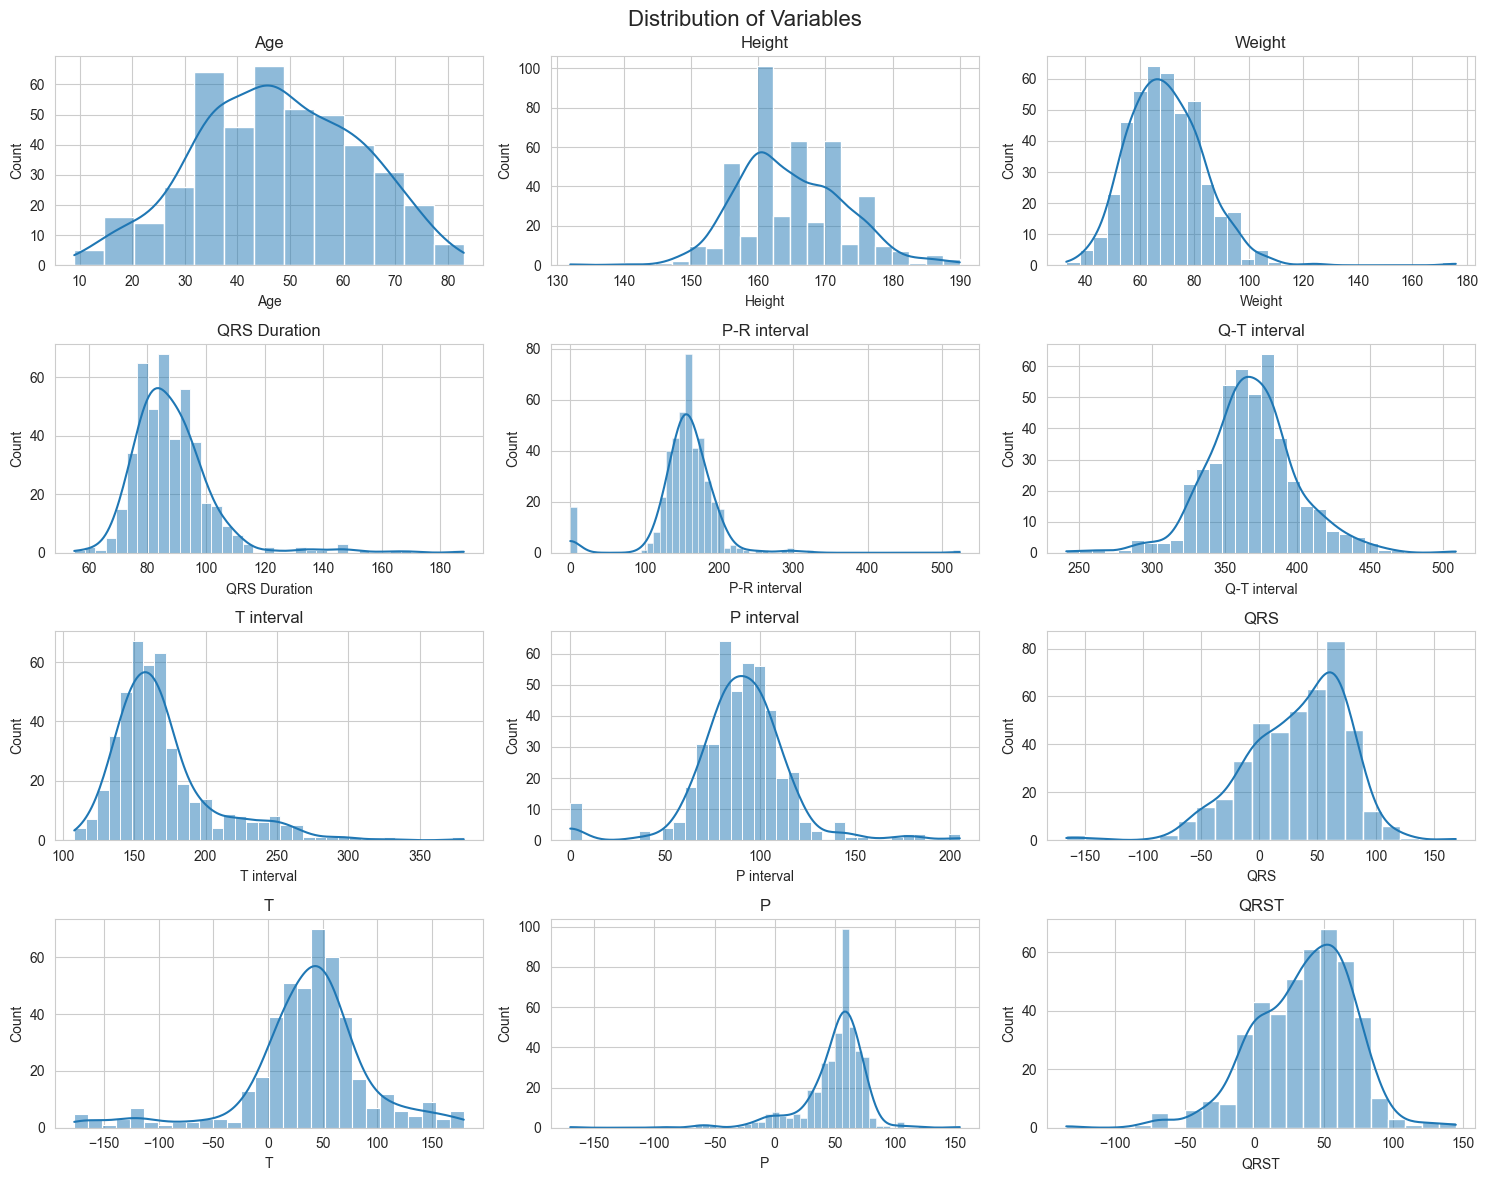

In [19]:
# Plotting histograms with normal distribution curves
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()
columns = ['Age', 'Height', 'Weight', 'QRS Duration', 'P-R interval', 'Q-T interval', 'T interval',
           'P interval', 'QRS', 'T', 'P', 'QRST']

for i, col in enumerate(columns):
    sns.histplot(arr[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.suptitle("Distribution of Variables", fontsize=16)
plt.tight_layout()
plt.show()

These individual histograms with KDE show that most of the patients are in their 50s and 60s, the height and weight appears roughly normal yet have some outliers. 

In [20]:
# Calculate Z-scores for the numerical columns
z_scores = arr.select_dtypes(include=[np.number]).apply(zscore)

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# List the outliers
outlier_indices = np.where(outliers)
outlier_records = arr.iloc[outlier_indices[0]]

print("Outliers detected:")
outlier_records

Outliers detected:


,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,-87.0,63.0
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0
7,49,1,162,54,78,0,376,157,70,67,7.0,8.0,51.0,-87.0,67.0
20,28,1,160,58,83,251,383,189,183,50,39.0,46.0,43.0,-87.0,76.0
25,44,0,169,80,109,128,382,195,60,-34,112.0,154.0,7.0,-87.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,11,0,140,42,88,123,362,228,81,-18,52.0,67.0,33.0,-87.0,74.0
433,70,0,167,60,80,149,290,128,93,-67,111.0,26.0,-65.0,-87.0,120.0
448,37,0,190,85,100,137,361,201,73,86,66.0,52.0,79.0,-87.0,73.0
449,36,0,166,68,108,176,365,194,116,-85,-19.0,-61.0,-70.0,84.0,84.0


In [23]:
print(outlier_records)

     Age  Sex  Height  Weight  QRS Duration  P-R interval  Q-T interval  \
0     75    0     190      80            91           193           371   
2     54    0     172      95           138           163           386   
7     49    1     162      54            78             0           376   
20    28    1     160      58            83           251           383   
25    44    0     169      80           109           128           382   
..   ...  ...     ...     ...           ...           ...           ...   
432   11    0     140      42            88           123           362   
433   70    0     167      60            80           149           290   
448   37    0     190      85           100           137           361   
449   36    0     166      68           108           176           365   
450   32    1     155      55            93           106           386   

     T interval  P interval  QRS      T      P  QRST      J  Heart rate  
0           174         1

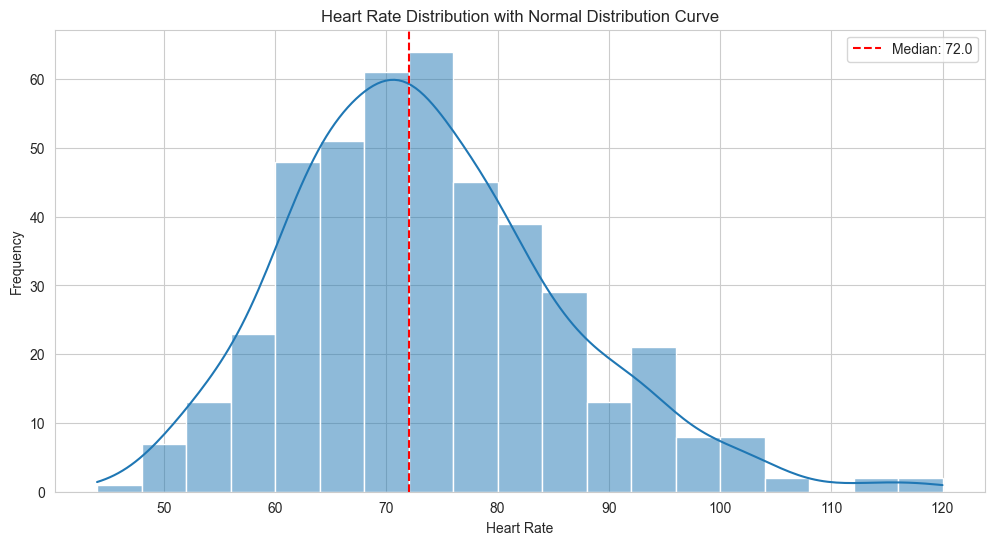

In [25]:
# Plotting the distribution of the Heart Rate with a normal distribution curve
sns.histplot(arr['Heart rate'], kde=True)
plt.axvline(arr['Heart rate'].median(), color='red', linestyle='--', label=f'Median: {arr["Heart rate"].median()}')
plt.title('Heart Rate Distribution with Normal Distribution Curve')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

This graph shows the distribution of heart rates overlaid with a KDE to show the probability density. It shows that heart rate has a meadian of 72 bpm, the distribution appears to be almost normal but also shows the presence of higher heart rates.

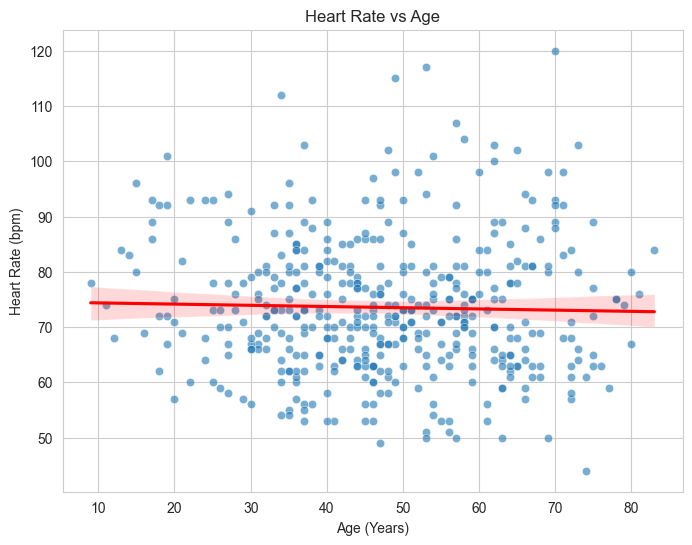

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=arr["Age"], y=arr["Heart rate"], alpha=0.6)
sns.regplot(x=arr["Age"], y=arr["Heart rate"], scatter=False, color='red')
plt.title("Heart Rate vs Age")
plt.xlabel("Age (Years)")
plt.ylabel("Heart Rate (bpm)")
plt.show()

This scatter plot shows the relationship between age and heart rate. It shows a wide spread of heart rates across different ages showings no clear correlation.

### 3. Features Importance Analysis:

#### a. Use suitable statistical analyses to pinpoint the most relevant variables affecting the Heart rate. 

#### b. The QRS is an important indicator of a normal heart, and several types of arrhythmia (e.g . Sinus tachycardia). Use peer-reviewed academic resources and suitable statistical tools to classify the patients within the dataset (i.e. highlight patients with arrhythmias).

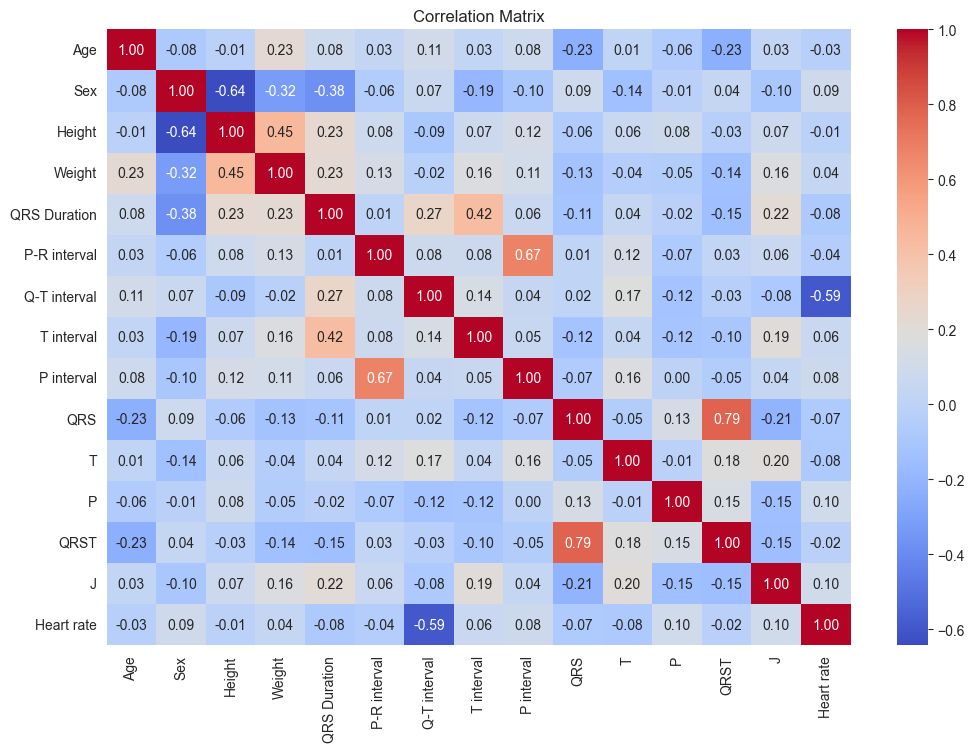

In [ ]:
# Correlation Analysis
# Exclude non-numeric columns
numeric_cols = arr.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation coefficients between different variables. It shows a strong positive correlation between QRST and QRS meaning that as one increases, the other tends to also increase. It shows a negative correlation between Heart rate and Q-T interval meaning that higher heart rates are associated with shorter Q-T intervals.

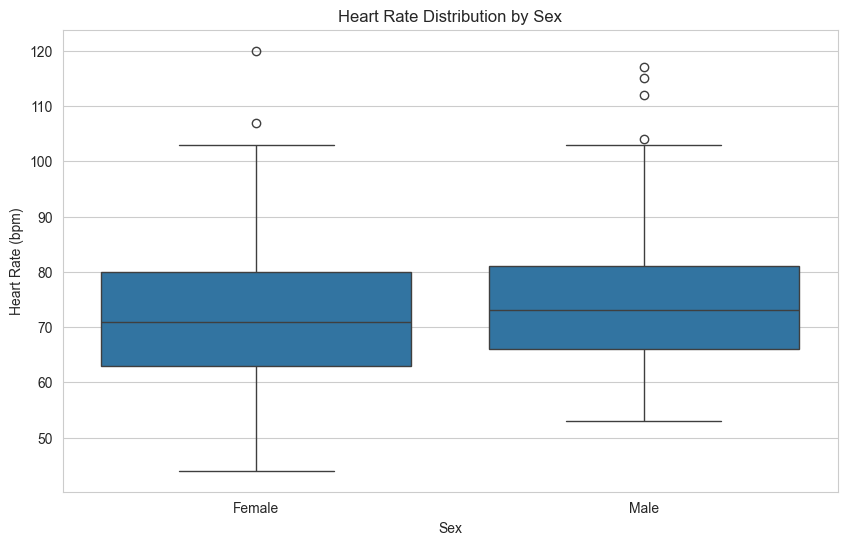

In [28]:
# Assume 'Sex' is binary (0 = Female, 1 = Male), adjust if needed
if 'Sex' in arr.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=arr['Sex'], y=arr['Heart rate'])
    plt.title("Heart Rate Distribution by Sex")
    plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
    plt.ylabel("Heart Rate (bpm)")
    plt.show()

This box plot shows the heart rate distributions between males and females showing that both sex have almost similar median heart rates except the females have a slightly higher median heart rate compared to males. 

In [29]:
arr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,437.0,47.565217,15.141488,9.0,36.0,47.0,59.0,83.0
Sex,437.0,0.556064,0.497416,0.0,0.0,1.0,1.0,1.0
Height,437.0,164.752860,8.023662,132.0,160.0,165.0,170.0,190.0
Weight,437.0,69.663616,14.417080,33.0,60.0,69.0,79.0,176.0
QRS Duration,437.0,88.432494,14.365898,55.0,80.0,86.0,94.0,188.0
P-R interval,437.0,155.244851,45.379309,0.0,142.0,157.0,175.0,524.0
Q-T interval,437.0,368.597254,31.286158,241.0,351.0,368.0,385.0,509.0
T interval,437.0,169.972540,35.727295,108.0,148.0,162.0,179.0,381.0
P interval,437.0,90.164760,25.980415,0.0,79.0,91.0,102.0,205.0
QRS,437.0,32.675057,43.240363,-166.0,4.0,40.0,65.0,169.0


This shows that the dataset consists of 437 individuals with a mean age of 47.57 years with a balanced gender distribution, an average height of 164.75 ranging from 132 cm to 190 cm, an average weight of 69.66 kg ranging from 33 kg to 176 kg, an average heart rate of 73.55 bpm ranging from 44 to 120 bpm

In [30]:
# Correlation between Age and Heart Rate
corr, p_value = pearsonr(arr["Age"], arr["Heart rate"])
print(f"Pearson Correlation between Age and Heart Rate: {corr:.3f} (p-value: {p_value:.3f})")

Pearson Correlation between Age and Heart Rate: -0.027 (p-value: 0.572)


In [31]:
# Ensure 'Sex' column has valid values
# create a dictionary to map the values of the sex variable
sex_map = {0: 'Male', 1: 'Female'}

# use the map function to label the values
arr['Sex'] = arr['Sex'].map(sex_map)

# Summary statistics for Heart Rate across Age (as a continuous variable)
print("\nOverall Heart Rate Statistics:\n", arr["Heart rate"].describe())


Overall Heart Rate Statistics:
 count    437.000000
mean      73.546911
std       12.212594
min       44.000000
25%       65.000000
50%       72.000000
75%       81.000000
max      120.000000
Name: Heart rate, dtype: float64


This shows that there are 437 individuals with a mean heart rate of 73.55 bpm and standard deviation of 12.21. This shows that generally, we have a healthy population and a moderate variability in heart rates among individuals.

In [32]:
# %% Feature Importance Analysis
# Prepare data for regression
X = arr[['Age', 'QRS Duration', 'P-R interval', 'Q-T interval']]
y = arr['Heart rate']
X = StandardScaler().fit_transform(X)


T-test Results (Heart Rate by Sex): t=-1.97, p=0.0494
Linear Regression Coefficients:
Height: -1.6825
Weight: 0.4929
QRS Duration: 0.6622
P-R interval: -1.5875
Q-T interval: -8.0692
T interval: 1.7954
P interval: 2.1773
QRS: -0.9303
T: -0.1082
P: 0.5240
QRST: 0.3568
J: -0.1938
Random Forest Classification Report for Arrhythmia Detection:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


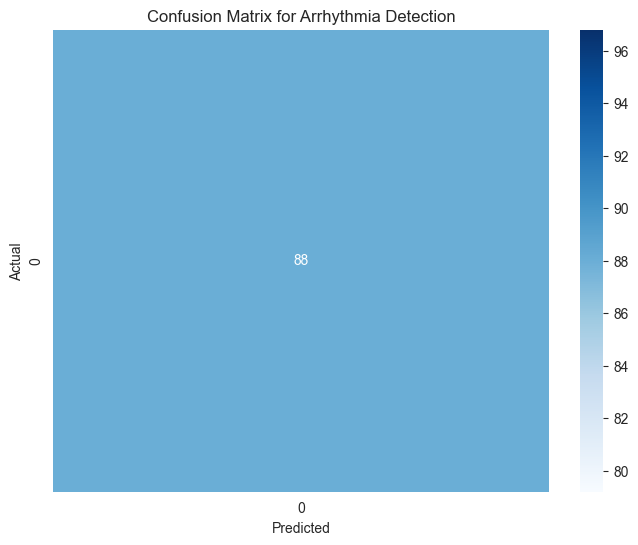

In [35]:
# T-test for heart rate between sexes
male_hr = arr[arr['Sex'] == 'Male']['Heart rate']
female_hr = arr[arr['Sex'] == 'Female']['Heart rate']
t_stat, p_value = stats.ttest_ind(male_hr, female_hr)
print(f"\nT-test Results (Heart Rate by Sex): t={t_stat:.2f}, p={p_value:.4f}")

# A. Regression Analysis
features = arr.drop(columns=['Heart rate', 'Sex', 'Age'])  # Drop non-numeric and target variable
target = arr['Heart rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline for regression
regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('regressor', LinearRegression())])

# Fit the model
regression_pipeline.fit(X_train, y_train)

# Predictions
y_pred = regression_pipeline.predict(X_test)

# Evaluate Regression
print("Linear Regression Coefficients:")
for i, col in enumerate(numeric_features):
    print(f"{col}: {regression_pipeline.named_steps['regressor'].coef_[i]:.4f}")

# B. Classification of Patients with Arrhythmias
arr['Arrhythmia'] = (arr['Heart rate'] > 100).astype(int)  # Example threshold for arrhythmia

# Features and target variable for classification
X_class = features
y_class = arr['Arrhythmia']

# Train-test split for classification
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Define the preprocessing for classification
X_class_train, X_class_test = preprocessor.fit_transform(X_class_train), preprocessor.transform(X_class_test)

# Train Random Forest for classification
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_class_train, y_class_train)

# Predictions
y_class_pred = rf_class.predict(X_class_test)

# Classification report
print("Random Forest Classification Report for Arrhythmia Detection:")
print(classification_report(y_class_test, y_class_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_class_test, y_class_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Arrhythmia Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This shows that from the T-test Results, T-value is -1.97 and p-value is 0.0494 and this indicates a difference in heart rates by sex (p < 0.05).
It also shows that from the Linear Regression Coefficients, Height is -1.6825, Weight is 0.4929, QRS Duration is 0.6622, P-R Interval is -1.5875 and Q-T Interval is -8.0692. This shows that there are 88 instances where no arrhythmia was present.

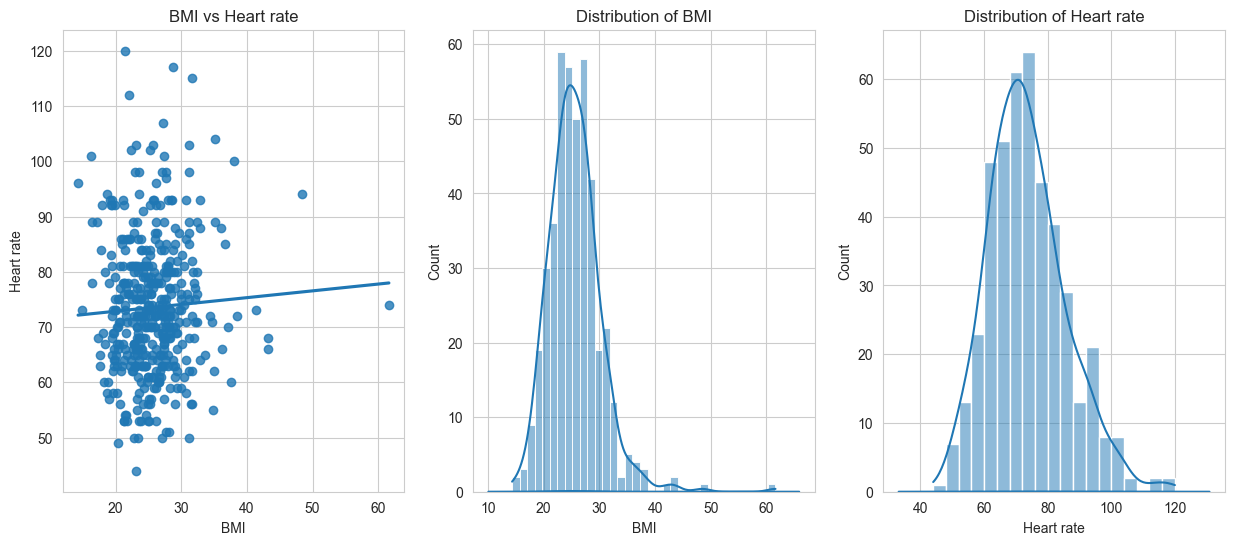

In [36]:
arr['BMI'] = (arr['Weight'] / (arr['Height']/100)**2).round(2)
arr

# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot scatter plot with regression line on the first subplot
sns.regplot(x='BMI', y='Heart rate', data=arr, ax=axes[0], ci=None)

# Plot histogram with normal curve on the second subplot
sns.histplot(data=arr, x="BMI", ax=axes[1], kde=True)
sns.histplot(data=arr, x="Heart rate", ax=axes[2], kde=True)

# Add a normal curve to the histogram
sns.kdeplot(data=arr, x="BMI", ax=axes[1])
sns.kdeplot(data=arr, x="Heart rate", ax=axes[2])

# Set titles for the subplots
axes[0].set_title('BMI vs Heart rate')
axes[1].set_title('Distribution of BMI')
axes[2].set_title('Distribution of Heart rate')

# Display the plot
plt.show()

This show the relationship between BMI and Heart rate suggesting that as BMI increases, the heart rate may also increase however the relationship seems weak. The BMI distribution is roughly normal with a peak among 25-30 and the heart rate distribution normal with a peak around 72 bpm

In [37]:
# Function to categorize QRS duration
def categorize_qrs_duration(qrs_duration):
    if qrs_duration < 100:
        return 'Normal Sinus Rhythm'
    elif 100 <= qrs_duration < 120:
        return 'Sinus Tachycardia'
    elif 120 <= qrs_duration <= 150:
        return 'Atrial Fibrillation (Rapid Ventricular Response)'
    else:
        return 'Ventricular Tachycardia'

# Apply the function to the 'QRS Duration' column
arr['arr_types'] = arr['QRS'].apply(categorize_qrs_duration)

# Display the first few rows of the DataFrame to see the new column
print(arr[['QRS', 'arr_types']].head())

arr['arr_types'].unique()

   QRS            arr_types
0  -16  Normal Sinus Rhythm
1   25  Normal Sinus Rhythm
2   96  Normal Sinus Rhythm
3   28  Normal Sinus Rhythm
5  107    Sinus Tachycardia


array(['Normal Sinus Rhythm', 'Sinus Tachycardia',
       'Ventricular Tachycardia',
       'Atrial Fibrillation (Rapid Ventricular Response)'], dtype=object)

In [38]:
arr.head()

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate,Arrhythmia,BMI,arr_types
0,75,Male,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,-87.0,63.0,0,22.16,Normal Sinus Rhythm
1,56,Female,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,-87.0,53.0,0,23.51,Normal Sinus Rhythm
2,54,Male,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,32.11,Normal Sinus Rhythm
3,55,Male,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,-87.0,71.0,0,30.69,Normal Sinus Rhythm
5,13,Male,169,51,100,167,321,174,91,107,66.0,52.0,88.0,-87.0,84.0,0,17.86,Sinus Tachycardia


In [39]:
# Function to categorize QRS duration
def categorize_qrs_duration(qrs_duration):
    if qrs_duration < 100:
        return 'Normal Sinus Rhythm'
    elif 100 <= qrs_duration < 120:
        return 'Sinus Tachycardia'
    elif 120 <= qrs_duration <= 150:
        return 'Atrial Fibrillation (Rapid Ventricular Response)'
    else:
        return 'Ventricular Tachycardia'

# Apply the function to the 'QRS Duration' column
arr['arrhythmia_types'] = arr['QRS'].apply(categorize_qrs_duration)

# Display the first few rows of the DataFrame to see the new column
print(arr[['QRS', 'arrhythmia_types']].head())

# Filter the DataFrame to include only patients with arrhythmias
arrhythmia_patients = arr[arr['arrhythmia_types'] != 'Normal Sinus Rhythm']

# Display the DataFrame
print("\nPatients with Arrhythmias:")
print(arrhythmia_patients)
print(f"\nTotal patients with arrhythmias: {arrhythmia_patients.shape[0]}")

   QRS     arrhythmia_types
0  -16  Normal Sinus Rhythm
1   25  Normal Sinus Rhythm
2   96  Normal Sinus Rhythm
3   28  Normal Sinus Rhythm
5  107    Sinus Tachycardia

Patients with Arrhythmias:
     Age     Sex  Height  Weight  QRS Duration  P-R interval  Q-T interval  \
5     13    Male     169      51           100           167           321   
76    45    Male     177      72            94           164           431   
102   19  Female     157      40            98           176           343   
211   18    Male     180      63            93           160           321   
321   26    Male     180      97            88           197           404   
336   31  Female     165      56            74           199           384   
348   34  Female     165      60            74           178           302   
380   66    Male     168      82            86           164           386   
397   30  Female     160      52           110           154           426   

     T interval  P inte